# Exploratory Data Analysis (EDA)
## Credit Risk Scoring Project

**Objectif :** Explorer et comprendre les données Home Credit avant le feature engineering.

---

## 1. Setup et Import des librairies

In [1]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')

# Paths
DATA_PATH = '../data/raw/'

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Chargement des données

In [2]:
# Charger la table principale (application_train)
df_train = pd.read_csv(DATA_PATH + 'application_train.csv')
print(f"application_train: {df_train.shape[0]:,} lignes, {df_train.shape[1]} colonnes")

application_train: 307,511 lignes, 122 colonnes


In [3]:
# Aperçu des premières lignes
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [4]:
# Informations sur les types de données
df_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), str(16)
memory usage: 286.2 MB


## 3. Analyse de la variable cible (TARGET)

In [5]:
# Distribution de la variable cible
target_counts = df_train['TARGET'].value_counts()
target_pct = df_train['TARGET'].value_counts(normalize=True) * 100

print("Distribution de TARGET:")
print(f"  0 (Pas de défaut): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"  1 (Défaut):        {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\nRatio de déséquilibre: 1:{target_counts[0]//target_counts[1]}")

Distribution de TARGET:
  0 (Pas de défaut): 282,686 (91.93%)
  1 (Défaut):        24,825 (8.07%)

Ratio de déséquilibre: 1:11


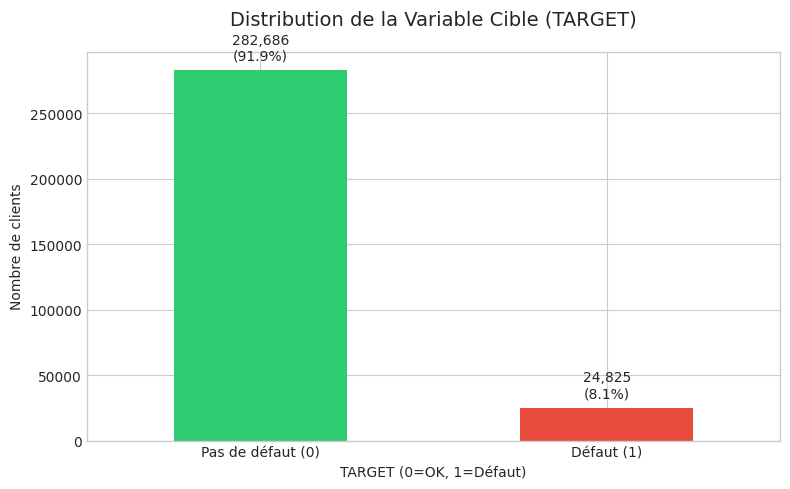

In [17]:
# Visualisation
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#2ecc71', '#e74c3c']
df_train['TARGET'].value_counts().plot(kind='bar', color=colors, ax=ax)
ax.set_title('Distribution de la Variable Cible (TARGET)', fontsize=14, pad=20)
ax.set_xlabel('TARGET (0=OK, 1=Défaut)')
ax.set_ylabel('Nombre de clients')
ax.set_xticklabels(['Pas de défaut (0)', 'Défaut (1)'], rotation=0)

# Ajouter les pourcentages
for i, (count, pct) in enumerate(zip(target_counts, target_pct)):
    ax.text(i, count + 8000, f'{count:,}\n({pct:.1f}%)', ha='center', fontsize=10) 

plt.tight_layout()
plt.show()

## 4. Analyse des valeurs manquantes

In [18]:
# Calculer le % de valeurs manquantes par colonne
missing = df_train.isnull().sum()
missing_pct = (missing / len(df_train)) * 100
missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
}).sort_values('missing_pct', ascending=False)

# Afficher les colonnes avec des valeurs manquantes
missing_df[missing_df['missing_pct'] > 0].head(20)

,missing_count,missing_pct
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


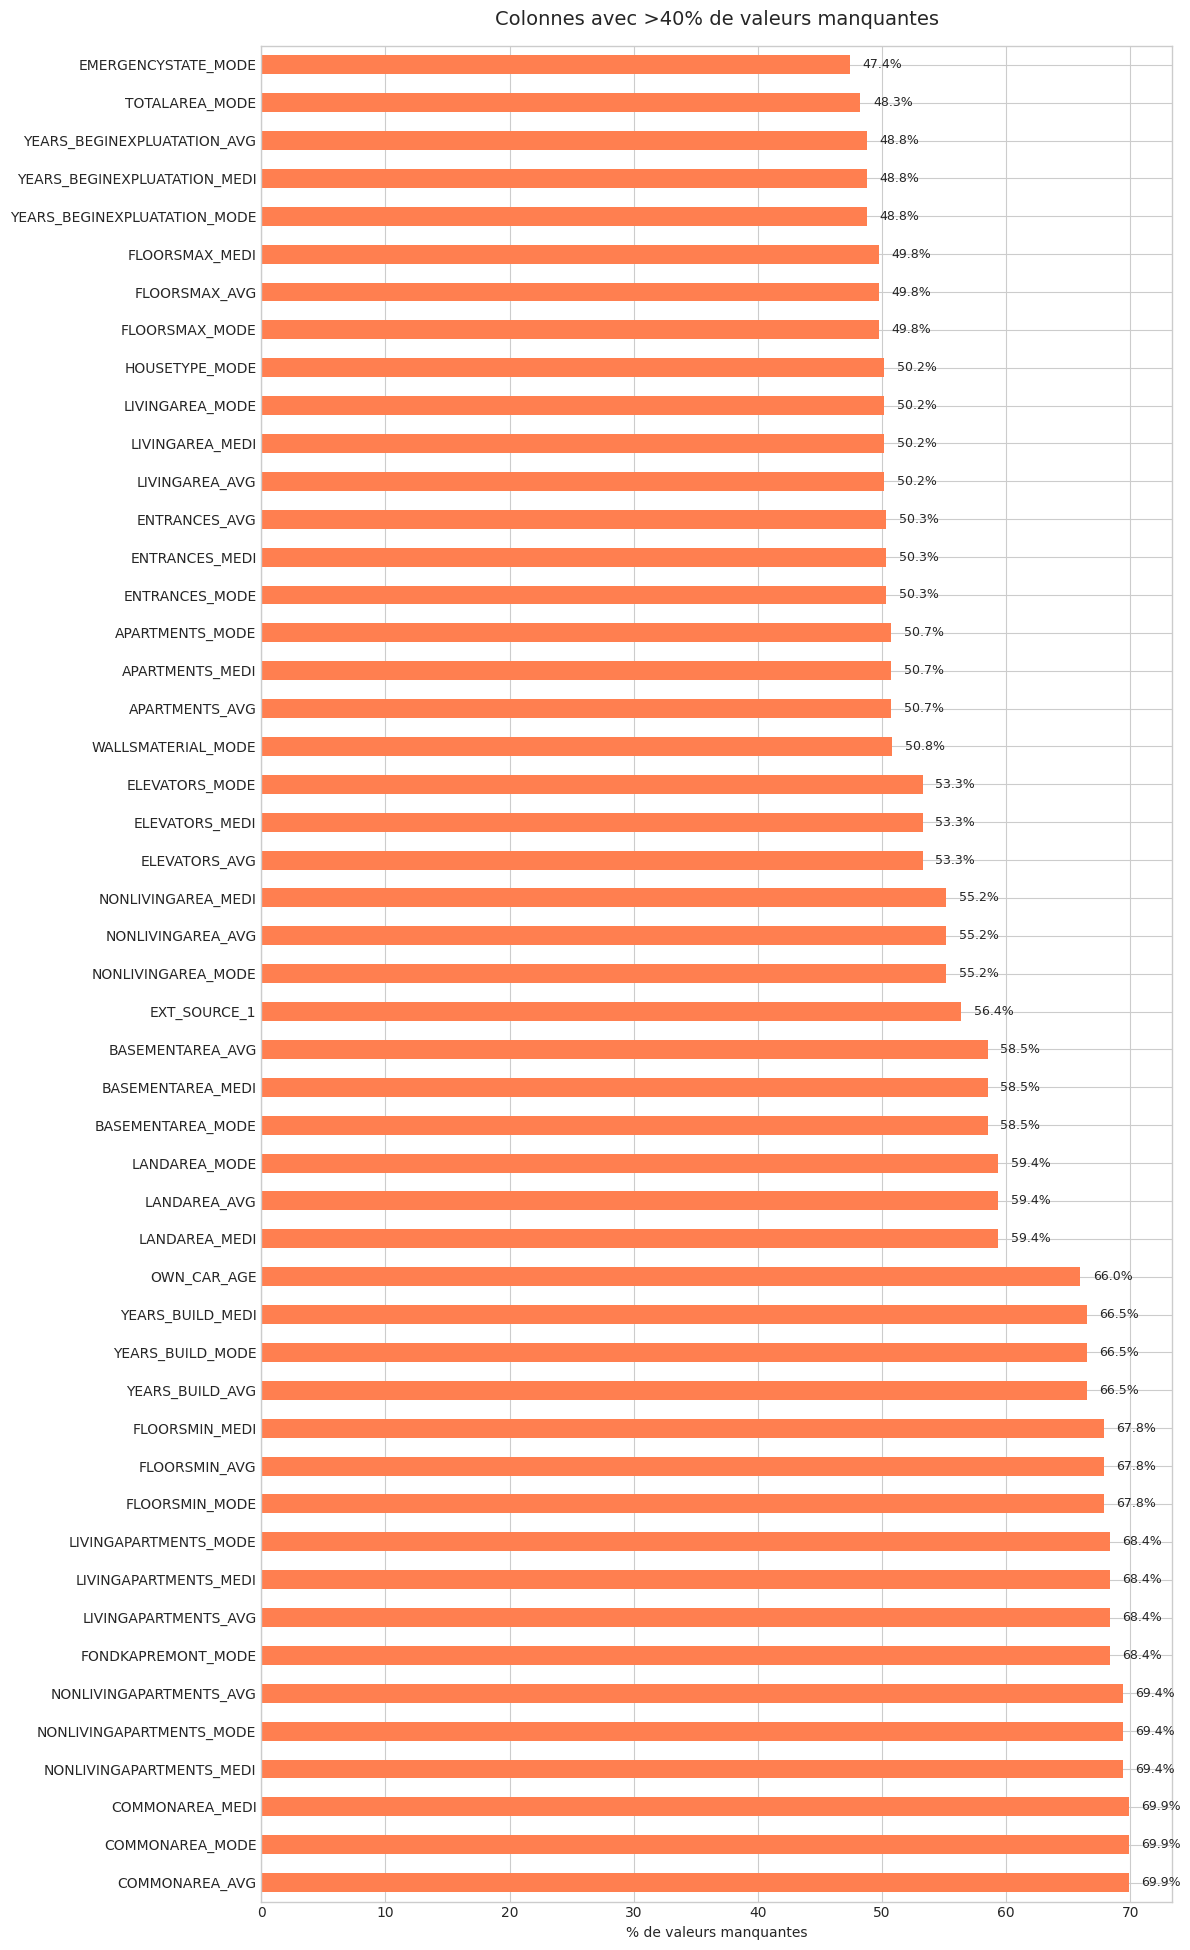

In [21]:
# Visualisation des colonnes avec le plus de valeurs manquantes                                                                       
top_missing = missing_df[missing_df['missing_pct'] > 40]                                                                              
                                                                                                                                        
if len(top_missing) > 0:                                                                                                              
    fig, ax = plt.subplots(figsize=(12, max(6, len(top_missing) * 0.4)))  # Hauteur dynamique                                         
    top_missing['missing_pct'].plot(kind='barh', ax=ax, color='coral')                                                                
    ax.set_title('Colonnes avec >40% de valeurs manquantes', fontsize=14, pad=15)                                                     
    ax.set_xlabel('% de valeurs manquantes')                                                                                          
    ax.set_ylabel('')                                                                                                                 
                                                                                                                                        
    # Ajouter les pourcentages à droite des barres                                                                                    
    for i, v in enumerate(top_missing['missing_pct']):                                                                                
        ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)                                                                       
                                                                                                                                        
    plt.tight_layout()                                                                                                                
    plt.show()                                                                                                                        
else:                                                                                                                                 
    print("Aucune colonne avec >40% de valeurs manquantes")

In [22]:
# Résumé des valeurs manquantes
print(f"Colonnes sans valeurs manquantes: {(missing_pct == 0).sum()}")
print(f"Colonnes avec <10% manquantes: {((missing_pct > 0) & (missing_pct < 10)).sum()}")
print(f"Colonnes avec 10-50% manquantes: {((missing_pct >= 10) & (missing_pct < 50)).sum()}")
print(f"Colonnes avec >50% manquantes: {(missing_pct >= 50).sum()}")

Colonnes sans valeurs manquantes: 55
Colonnes avec <10% manquantes: 10
Colonnes avec 10-50% manquantes: 16
Colonnes avec >50% manquantes: 41


## 5. Analyse des variables numériques

In [23]:
# Identifier les colonnes numériques
num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('TARGET')  # Exclure la cible
num_cols.remove('SK_ID_CURR')  # Exclure l'ID

print(f"Nombre de variables numériques: {len(num_cols)}")

Nombre de variables numériques: 104


In [25]:
# Statistiques descriptives des variables clés

# Variables clés sélectionnées selon les critères métier du credit scoring :                                                          
# - Capacité financière : AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE                                                  
# - Stabilité : DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH                                                                     
# - Démographie : DAYS_BIRTH 

key_numeric = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
               'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

df_train[key_numeric].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,3522.886321,1509.450419
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,0.000000,0.000000


In [26]:
# Convertir DAYS_BIRTH en années (valeurs négatives)
df_train['AGE_YEARS'] = -df_train['DAYS_BIRTH'] / 365

print("Distribution de l'âge:")
print(df_train['AGE_YEARS'].describe())

Distribution de l'âge:
count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE_YEARS, dtype: float64


/tmp/ipykernel_71374/639594266.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['AGE_YEARS'] = -df_train['DAYS_BIRTH'] / 365


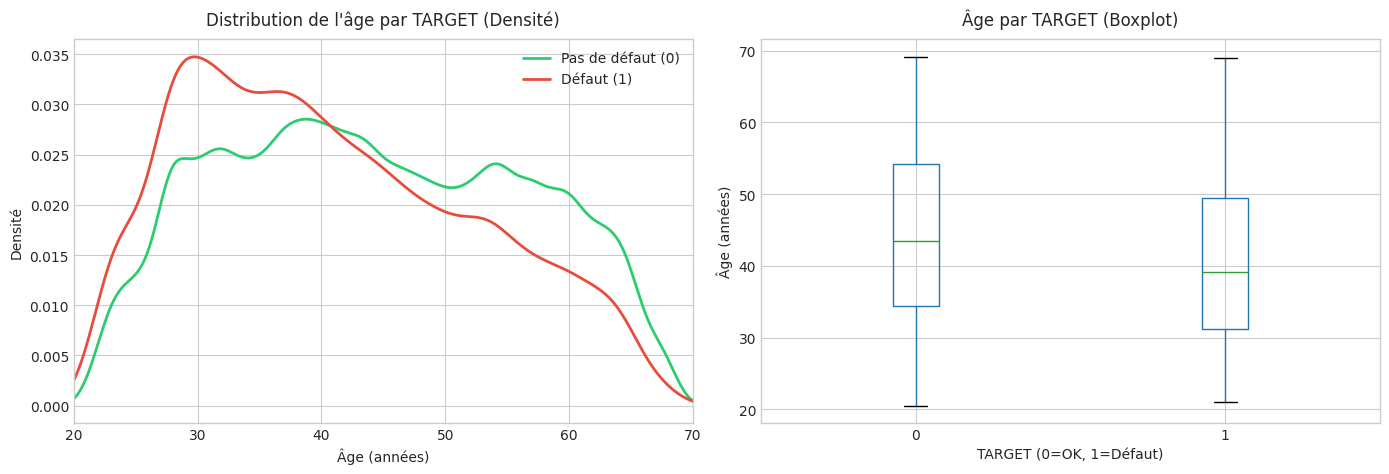

In [29]:
# Distribution de l'âge par TARGET                                                                                
fig, axes = plt.subplots(1, 2, figsize=(14, 5))                                                                                       
                                                                                                                                        
# Graphique 1 : KDE (courbes de densité)                                                                               
ax1 = axes[0]                                                                                                                         
df_train[df_train['TARGET']==0]['AGE_YEARS'].plot(kind='kde', ax=ax1, label='Pas de défaut (0)', color='#2ecc71', linewidth=2)        
df_train[df_train['TARGET']==1]['AGE_YEARS'].plot(kind='kde', ax=ax1, label='Défaut (1)', color='#e74c3c', linewidth=2)               
ax1.set_title("Distribution de l'âge par TARGET (Densité)", fontsize=12, pad=10)                                                      
ax1.set_xlabel('Âge (années)')                                                                                                        
ax1.set_ylabel('Densité')                                                                                                             
ax1.legend()                                                                                                                          
ax1.set_xlim(20, 70)                                                                                                                  
                                                                                                                                        
# Graphique 2 : Boxplot - comparaison directe                                                                                         
ax2 = axes[1]                                                                                                                         
df_train.boxplot(column='AGE_YEARS', by='TARGET', ax=ax2)                                                                             
ax2.set_title("Âge par TARGET (Boxplot)", fontsize=12, pad=10)                                                                        
ax2.set_xlabel('TARGET (0=OK, 1=Défaut)')                                                                                             
ax2.set_ylabel('Âge (années)')                                                                                                        
plt.suptitle('')  # Enlever le titre auto du boxplot                                                                                  
                                                                                                                                        
plt.tight_layout()                                                                                                                    
plt.show()

/tmp/ipykernel_71374/2186964389.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['AGE_BIN'] = pd.cut(df_train['AGE_YEARS'], bins=[20, 30, 40, 50, 60, 70])


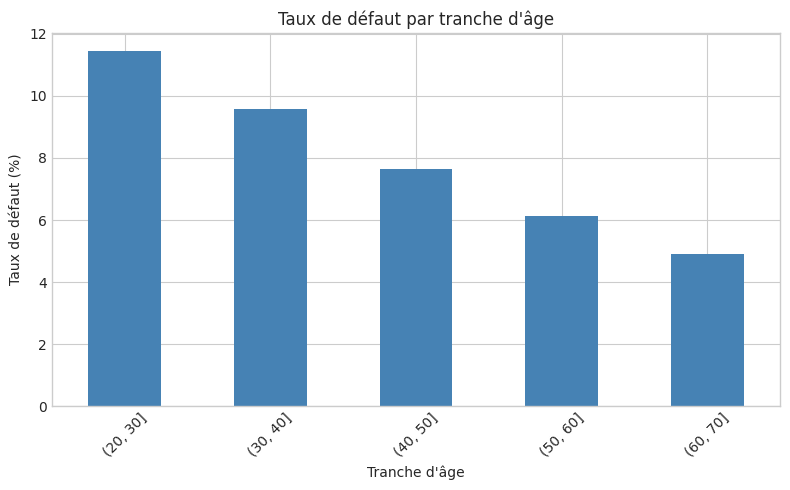

In [30]:
# Taux de défaut par tranche d'âge
df_train['AGE_BIN'] = pd.cut(df_train['AGE_YEARS'], bins=[20, 30, 40, 50, 60, 70])
age_default = df_train.groupby('AGE_BIN')['TARGET'].mean() * 100

fig, ax = plt.subplots(figsize=(8, 5))
age_default.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Taux de défaut par tranche d\'âge')
ax.set_xlabel('Tranche d\'âge')
ax.set_ylabel('Taux de défaut (%)')
ax.set_xticklabels([str(x) for x in age_default.index], rotation=45)
plt.tight_layout()
plt.show()

## 6. Analyse des variables catégorielles

In [31]:
# Identifier les colonnes catégorielles
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()
print(f"Nombre de variables catégorielles: {len(cat_cols)}")
print(f"\nListe: {cat_cols}")

Nombre de variables catégorielles: 16

Liste: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


/tmp/ipykernel_71374/2517272769.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()


In [33]:
# Cardinalité (Nombre de valeurs uniques) des variables catégorielles
cardinality = df_train[cat_cols].nunique().sort_values(ascending=False)
print("Cardinalité des variables catégorielles:")
print(cardinality)

Cardinalité des variables catégorielles:
ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
CODE_GENDER                    3
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64


In [34]:
# Taux de défaut par type de contrat
contract_default = df_train.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(['mean', 'count'])
contract_default['mean'] = contract_default['mean'] * 100
contract_default.columns = ['Taux défaut (%)', 'Nombre']
print("Taux de défaut par type de contrat:")
print(contract_default)

Taux de défaut par type de contrat:
                    Taux défaut (%)  Nombre
NAME_CONTRACT_TYPE                         
Cash loans                 8.345913  278232
Revolving loans            5.478329   29279


In [38]:
# Vérification : nombre de défauts par genre                                                                                          
print(df_train.groupby('CODE_GENDER')['TARGET'].sum())

CODE_GENDER
F      14170
M      10655
XNA        0
Name: TARGET, dtype: int64


In [39]:
# Taux de défaut par genre
gender_default = df_train.groupby('CODE_GENDER')['TARGET'].agg(['mean', 'count'])
gender_default['mean'] = gender_default['mean'] * 100
gender_default.columns = ['Taux défaut (%)', 'Nombre']
print("Taux de défaut par genre:")
print(gender_default)

Taux de défaut par genre:
             Taux défaut (%)  Nombre
CODE_GENDER                         
F                   6.999328  202448
M                  10.141920  105059
XNA                 0.000000       4


In [36]:
# Taux de défaut par niveau d'éducation
edu_default = df_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(['mean', 'count'])
edu_default['mean'] = edu_default['mean'] * 100
edu_default.columns = ['Taux défaut (%)', 'Nombre']
edu_default = edu_default.sort_values('Taux défaut (%)', ascending=False)
print("Taux de défaut par niveau d'éducation:")
print(edu_default)

Taux de défaut par niveau d'éducation:
                               Taux défaut (%)  Nombre
NAME_EDUCATION_TYPE                                   
Lower secondary                      10.927673    3816
Secondary / secondary special         8.939929  218391
Incomplete higher                     8.484966   10277
Higher education                      5.355115   74863
Academic degree                       1.829268     164


## 7. Corrélations avec TARGET

In [40]:
# Corrélations avec TARGET
correlations = df_train[num_cols + ['TARGET']].corr()['TARGET'].drop('TARGET').sort_values()

print("Top 10 corrélations NÉGATIVES avec TARGET:")
print(correlations.head(10))
print("\nTop 10 corrélations POSITIVES avec TARGET:")
print(correlations.tail(10))

Top 10 corrélations NÉGATIVES avec TARGET:
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64

Top 10 corrélations POSITIVES avec TARGET:
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
Name: TARGET, dtype: float64


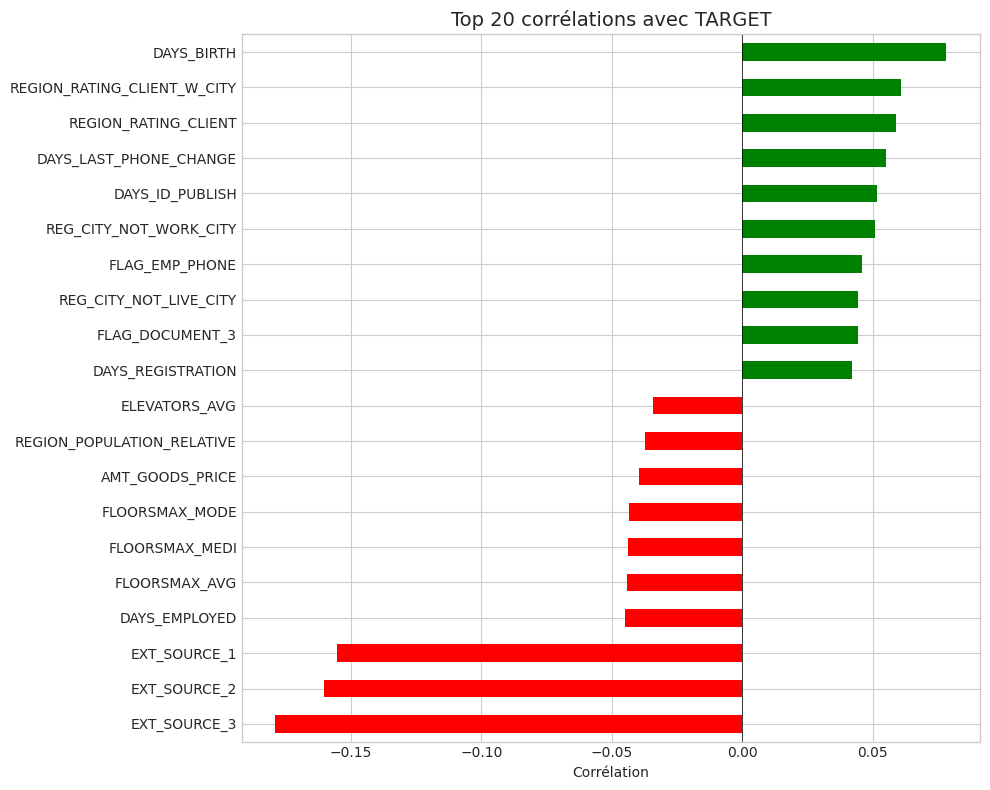

In [42]:
# Visualisation des corrélations les plus fortes
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in top_corr.values]
top_corr.plot(kind='barh', ax=ax, color=colors)
ax.set_title('Top 20 corrélations avec TARGET', fontsize=14)
ax.set_xlabel('Corrélation')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

## 8. Aperçu des tables secondaires

In [43]:
# Charger et afficher un aperçu de chaque table
tables = {
    'bureau': 'bureau.csv',
    'bureau_balance': 'bureau_balance.csv',
    'previous_application': 'previous_application.csv',
    'POS_CASH_balance': 'POS_CASH_balance.csv',
    'credit_card_balance': 'credit_card_balance.csv',
    'installments_payments': 'installments_payments.csv'
}

for name, file in tables.items():
    df = pd.read_csv(DATA_PATH + file, nrows=1000)  # Charger seulement 1000 lignes pour aperçu
    full_count = sum(1 for _ in open(DATA_PATH + file)) - 1  # Compter les lignes
    print(f"\n{'='*60}")
    print(f"{name}: {full_count:,} lignes, {df.shape[1]} colonnes")
    print(f"Colonnes: {list(df.columns)}")


bureau: 1,716,428 lignes, 17 colonnes
Colonnes: ['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']

bureau_balance: 27,299,925 lignes, 3 colonnes
Colonnes: ['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS']

previous_application: 1,670,214 lignes, 37 colonnes
Colonnes: ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_

## 9. Résumé et conclusions de l'EDA

### 1. Données chargées
- **307,511 clients**, 122 variables
- **104 variables numériques**, 16 catégorielles

### 2. Variable cible (TARGET)

| Classe | Nombre | Pourcentage |
|--------|--------|-------------|
| 0 (Pas de défaut) | 282,686 | 91.93% |
| 1 (Défaut) | 24,825 | 8.07% |

**Ratio de déséquilibre : 1:11** → Nécessite `scale_pos_weight` ou SMOTE

### 3. Valeurs manquantes

| Catégorie | Nombre de colonnes |
|-----------|-------------------|
| Sans valeurs manquantes | 55 |
| < 10% manquantes | 10 |
| 10-50% manquantes | 16 |
| > 50% manquantes | 41 |

**Action :** Variables >70% manquantes à évaluer pour suppression

### 4. Corrélations avec TARGET

**Négatives (réduisent le risque) :**
- EXT_SOURCE_3 : -0.179
- EXT_SOURCE_2 : -0.160
- EXT_SOURCE_1 : -0.155

**Positives (augmentent le risque) :**
- DAYS_BIRTH : +0.078 (clients plus jeunes = plus de défauts)
- REGION_RATING_CLIENT : +0.059

### 5. Insights métier

| Variable | Observation | Taux défaut |
|----------|-------------|-------------|
| **Genre** | Hommes > Femmes | M: 10.1% vs F: 7.0% |
| **Contrat** | Cash loans > Revolving | 8.3% vs 5.5% |
| **Éducation** | Lower secondary = plus risqué | 10.9% vs 5.4% (Higher) |
| **Âge** | Jeunes (20-30) = plus risqué | ~11% vs ~5% (60-70) |

### 6. Tables secondaires

| Table | Lignes | Utilité |
|-------|--------|---------|
| bureau | 1.7M | Historique crédits externes |
| bureau_balance | 27.3M | Soldes mensuels bureau |
| previous_application | 1.7M | Demandes précédentes |
| installments_payments | 13.6M | Historique paiements |

### Prochaines étapes (Feature Engineering)

1. Agréger les tables secondaires par client (SK_ID_CURR)
2. Créer des ratios financiers (credit/income, annuity/income)
3. Encoder les variables catégorielles
4. Gérer les valeurs manquantes

In [44]:
# Sauvegarder les colonnes importantes pour le feature engineering
print("Notebook EDA terminé!")

Notebook EDA terminé!
